In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [10]:
# Load the dataset from a CSV file

df = pd.read_csv("Iris.csv")

In [11]:
# Extracting feature columns
feature_columns = df.columns[:-1]  # Exclude the last column (assuming it is the target variable)
X = df[feature_columns]

In [12]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Function to plot the elbow method
def plot_elbow(X):
    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    # Plotting the elbow method
    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Within-cluster sum of squares (WCSS)')
    plt.show()

In [15]:
# Get user input for k
k_value = int(input("Enter the value of k: "))

In [16]:
# Implementing K-Means clustering
kmeans = KMeans(n_clusters=k_value, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X_scaled)

c:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

KMeans(n_clusters=5, n_init=10, random_state=0)

c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

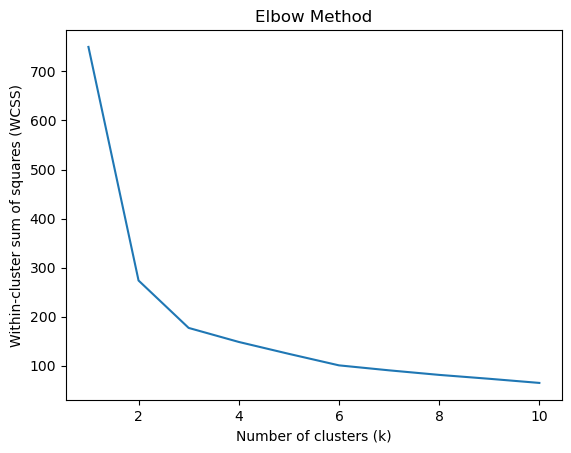

In [17]:
# Adding cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# Plotting the elbow method to suggest a value for k
plot_elbow(X_scaled)

In [18]:
# Display the results
print("\nCluster Centers:")
print(pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=feature_columns))

print("\nCounts per Cluster:")
print(df['Cluster'].value_counts())


Cluster Centers:
           Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0   26.153846       5.246154      3.692308       1.476923      0.280769
1   92.888889       6.162222      2.893333       4.746667      1.582222
2   79.434783       5.552174      2.478261       3.956522      1.208696
3   24.791667       4.745833      3.120833       1.450000      0.204167
4  126.343750       6.912500      3.125000       5.812500      2.143750

Counts per Cluster:
Cluster
1    45
4    32
0    26
3    24
2    23
Name: count, dtype: int64


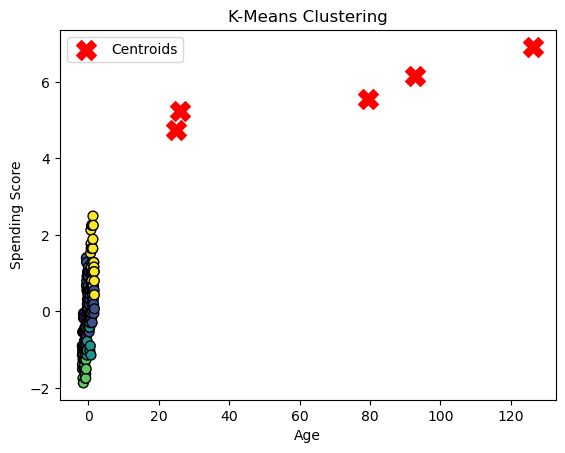

In [19]:
# Visualizing the clusters (for the first two features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=df['Cluster'], cmap='viridis', edgecolor='k', s=50)
plt.scatter(scaler.inverse_transform(kmeans.cluster_centers_)[:, 0], scaler.inverse_transform(kmeans.cluster_centers_)[:, 1], marker='X', c='red', s=200, label='Centroids')
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('K-Means Clustering')
plt.legend()
plt.show()